# Video Processing for Pendulum Dynamics

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

In [27]:
video_capture = cv2.VideoCapture("Videos/pendulum.m4v")

In [3]:
ret, last_frame = video_capture.read()

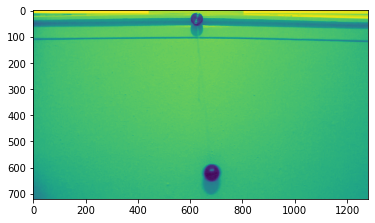

In [4]:
image_gray = rgb2gray(last_frame)
plt.imshow(image_gray)

In [33]:
print(image_gray.shape)

(720, 1280)


In [88]:
#blobs_log = blob_log(img, max_sigma=30, num_sigma=10, threshold=.15)
#blobs_dog = blob_dog(image_gray, max_sigma=20, threshold=.5)
blobs_doh = blob_doh(image_gray, max_sigma=40, threshold=.01)

In [89]:
print(blobs_doh)

[[ 620.          682.           35.66666667]
 [  41.          625.           35.66666667]
 [   0.         1259.           40.        ]]


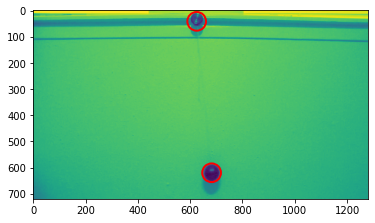

In [93]:
fig, ax = plt.subplots()
ax.imshow(image_gray)
for blob in blobs_doh:
    y, x, r = blob
    if x>0 and y>0:
        c = plt.Circle((x, y), r, color='r', linewidth=2, fill=False)
        ax.add_patch(c)

plt.show()

In [29]:
position_list=[]
while(True):
    ret, frame = video_capture.read()
    if ret == False:
        break
    image_gray = rgb2gray(frame)
    #fig, ax = plt.subplots()
    #ax.imshow(image_gray)
    blobs_doh = blob_doh(image_gray, max_sigma=40, threshold=.01)
    blobs = []
    for blob in blobs_doh:
        y, x, r = blob
        if x>0 and y>0:
            blobs.append([x,y,r])
            #c = plt.Circle((x, y), r, color='r', linewidth=2, fill=False)
            #ax.add_patch(c)
    position_list.append(blobs)
#plt.show()

In [37]:
len(position_list)
npa = np.array(position_list, dtype=np.float32)
np.save("Data/positions.npy",npa)

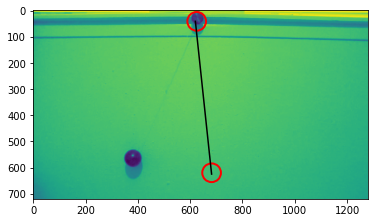

In [44]:
fig, ax = plt.subplots()
ax.imshow(image_gray)
x1,y1,r1 = npa[0,0]
x2,y2,r2 = npa[0,1]
c1 = plt.Circle((x1,y1), r1, color='r', linewidth=2, fill=False)
ax.add_patch(c1)
c2 = plt.Circle((x2,y2), r2, color='r', linewidth=2, fill=False)
ax.add_patch(c2)
plt.plot((x1,y1),(x2,y2), 'k-')
plt.show()

In [70]:
angles = []
for i in range(npa.shape[0]):
    x1,y1,r1 = npa[i,0]
    x2,y2,r2 = npa[i,1]
    print(x1,y1,x2,y2)
    slope = (y2-y1)/(x2-x1)
    print(slope)
    angle =  np.arctan(slope)
    print(angle)
    if angle<0:
        angle = -(angle+np.pi/2)
    else:
        angle = np.pi/2-angle
    
    angles.append(angle)

682.0 620.0 625.0 41.0
10.157895
1.472667
658.0 622.0 625.0 41.0
17.60606
1.5140587
635.0 623.0 625.0 41.0
58.2
1.5536159
611.0 623.0 625.0 41.0
-41.57143
-1.546746
588.0 622.0 625.0 41.0
-15.7027025
-1.5071989
565.0 620.0 625.0 41.0
-9.65
-1.4675379
542.0 618.0 625.0 41.0
-6.951807
-1.4279288
520.0 614.0 625.0 41.0
-5.457143
-1.3895609
498.0 610.0 625.0 41.0
-4.4803147
-1.3511971
477.0 605.0 625.0 40.0
-3.8175676
-1.3146055
457.0 600.0 626.0 41.0
-3.3076923
-1.2772074
438.0 594.0 625.0 41.0
-2.9572194
-1.2447121
420.0 588.0 625.0 41.0
-2.6682928
-1.212226
403.0 581.0 625.0 41.0
-2.4324324
-1.1807482
387.0 574.0 625.0 41.0
-2.2394958
-1.1508325
372.0 568.0 625.0 41.0
-2.083004
-1.1232147
358.0 561.0 625.0 41.0
-1.9475656
-1.0964376
346.0 554.0 625.0 41.0
-1.8387097
-1.0726796
334.0 548.0 625.0 41.0
-1.7422681
-1.0497406
324.0 542.0 625.0 41.0
-1.6644518
-1.0297899
315.0 536.0 625.0 41.0
-1.5967742
-1.0112896
307.0 532.0 625.0 41.0
-1.5440252
-0.9960694
300.0 527.0 625.0 41.0
-1.4953846

345.0 553.0 625.0 41.0
-1.8285714
-1.0703555
342.0 552.0 625.0 41.0
-1.8056537
-1.0650281
340.0 551.0 625.0 42.0
-1.785965
-1.0603678
339.0 550.0 626.0 41.0
-1.7735192
-1.0573814
339.0 550.0 626.0 41.0
-1.7735192
-1.0573814
339.0 550.0 626.0 41.0
-1.7735192
-1.0573814
341.0 551.0 626.0 41.0
-1.7894737
-1.0612041
344.0 553.0 625.0 42.0
-1.8185053
-1.0680282
348.0 555.0 626.0 42.0
-1.8453237
-1.0741851
353.0 557.0 625.0 42.0
-1.8933823
-1.0848789
359.0 561.0 625.0 42.0
-1.9511278
-1.0971797
366.0 564.0 626.0 42.0
-2.0076923
-1.1086825
375.0 568.0 626.0 42.0
-2.0956175
-1.1255656
384.0 572.0 626.0 42.0
-2.1900826
-1.1424643
394.0 577.0 626.0 42.0
-2.3060346
-1.1616262
405.0 581.0 626.0 42.0
-2.438914
-1.1816832
417.0 586.0 626.0 42.0
-2.6028707
-1.2039921
430.0 590.0 626.0 41.0
-2.8010204
-1.2278877
444.0 595.0 626.0 41.0
-3.043956
-1.2533841
458.0 599.0 626.0 42.0
-3.3154762
-1.2778578
474.0 603.0 626.0 42.0
-3.6907895
-1.3062042
490.0 608.0 626.0 42.0
-4.1617646
-1.3349841
506.0 611.0 6

865.0 569.0 626.0 37.0
2.2259414
1.1485678
862.0 571.0 626.0 37.0
2.2627118
1.1546589
858.0 572.0 627.0 37.0
2.3160174
1.1632006
854.0 574.0 626.0 37.0
2.3552632
1.1692806
848.0 576.0 626.0 37.0
2.427928
1.180096
842.0 579.0 626.0 37.0
2.5092592
1.191563
834.0 582.0 626.0 37.0
2.6201923
1.2062072
826.0 585.0 626.0 37.0
2.74
1.2208537
817.0 588.0 627.0 37.0
2.9
1.2387369
807.0 592.0 627.0 37.0
3.0833333
1.2571757
796.0 595.0 626.0 37.0
3.282353
1.2750703
784.0 598.0 626.0 37.0
3.550633
1.2962675
772.0 602.0 626.0 37.0
3.869863
1.3179209
759.0 605.0 626.0 37.0
4.2706766
1.3407854
745.0 608.0 626.0 37.0
4.7983193
1.3653309
731.0 611.0 626.0 37.0
5.4666667
1.3898698
716.0 613.0 626.0 37.0
6.4
1.4157996
700.0 615.0 627.0 37.0
7.917808
1.445164
685.0 617.0 627.0 37.0
10.0
1.4711276
669.0 618.0 626.0 37.0
13.511628
1.4969207
653.0 619.0 626.0 37.0
21.555555
1.5244378
636.0 619.0 626.0 37.0
58.2
1.5536159
620.0 620.0 626.0 36.0
-97.333336
-1.5605227
603.0 619.0 625.0 36.0
-26.5
-1.5330784
587.

In [71]:
angles

[0.09812934795883699,
 0.05673761765030427,
 0.01718039909866853,
 -0.024050311246190503,
 -0.06359739700821443,
 -0.1032584468510489,
 -0.14286752144363923,
 -0.18123538891342683,
 -0.2195992032673697,
 -0.25619085232285066,
 -0.29358895222214265,
 -0.3260842124607901,
 -0.35857029358414216,
 -0.3900481025364737,
 -0.4199637929585318,
 -0.44758160511520906,
 -0.4743587533619742,
 -0.4981166879322867,
 -0.5210557738926749,
 -0.5410064021733145,
 -0.5595067302372794,
 -0.5747269550946097,
 -0.5894257585194449,
 -0.599381879964147,
 -0.6079240600254874,
 -0.6150743524220328,
 -0.6188570419934134,
 -0.6198510686543326,
 -0.6198510686543326,
 -0.6174617568638663,
 -0.6112873713162283,
 -0.6051111976292471,
 -0.5941753546383719,
 -0.5842021266606192,
 -0.5680433074620108,
 -0.5518794814732413,
 -0.5318978587773184,
 -0.5119229118016104,
 -0.4889490167286734,
 -0.4636475602772574,
 -0.4368340531971793,
 -0.4075957099583487,
 -0.3776400844242911,
 -0.3451032201435904,
 -0.31251664558914705,
 

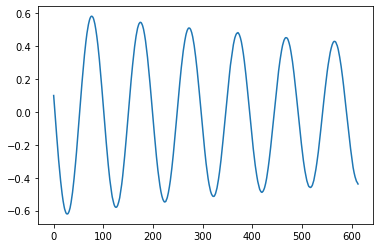

In [72]:
plt.plot(angles)

In [73]:
np.save("Data/angles.npy",angles)

2